<a href="https://colab.research.google.com/github/NayeonKeum/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/%EC%B1%95%ED%84%B02_1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
question=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/schema.csv')
question.shape

(290, 3)

In [ ]:
question.head()#상위 5개

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [ ]:
mcq=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

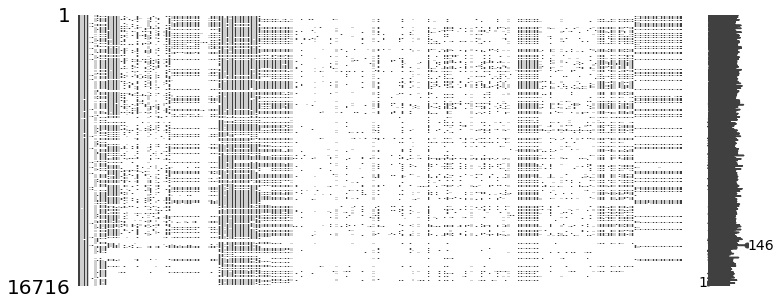

In [ ]:
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

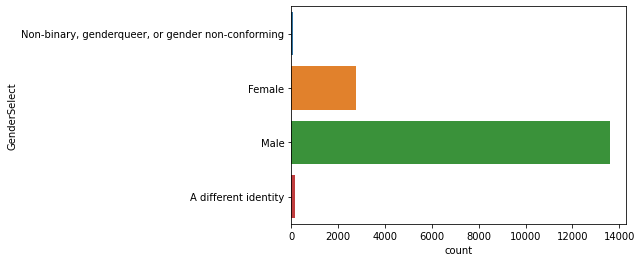

In [ ]:
#성별
sns.countplot(y='GenderSelect', data=mcq)

In [ ]:
# 국가별 응답 수
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['국가']=con_df.index
con_df.columns=['응답 수','국가']
con_df=con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

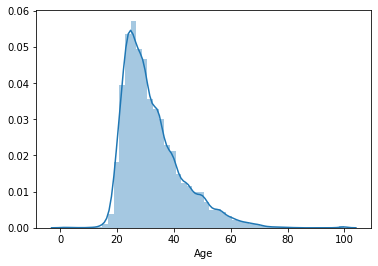

In [ ]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

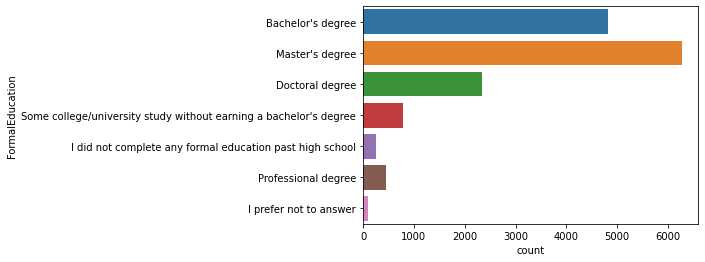

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

In [ ]:
#전공
mcq_major_count=pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df=mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns=['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


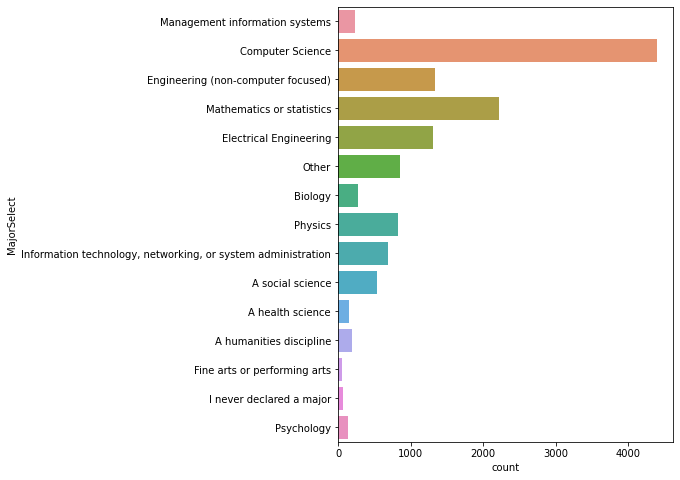

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [ ]:
#취업 여부
mcq_es_count=pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent=pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df=mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns=['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


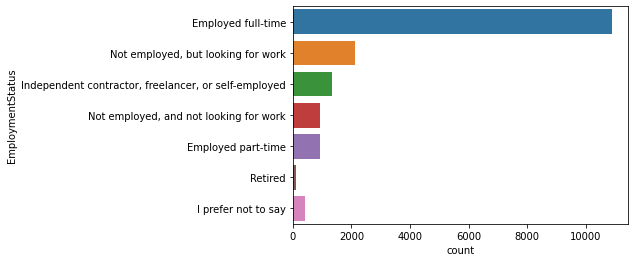

In [ ]:
sns.countplot(y='EmploymentStatus',data=mcq)

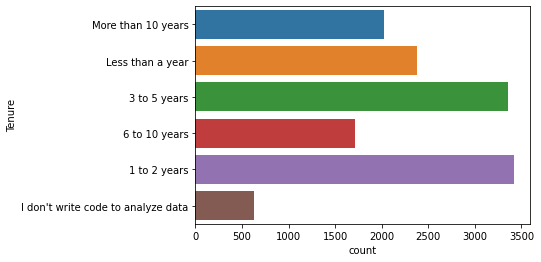

In [ ]:
#프로그래밍 경험
sns.countplot(y='Tenure',data=mcq)

The number of interviewees in Korea: 194


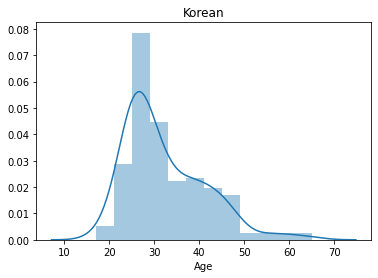

In [ ]:
korea=mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: '+str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

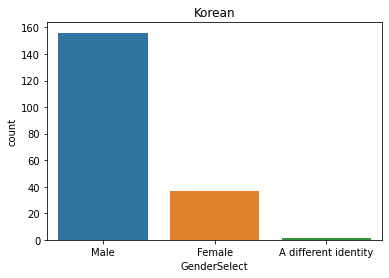

In [ ]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

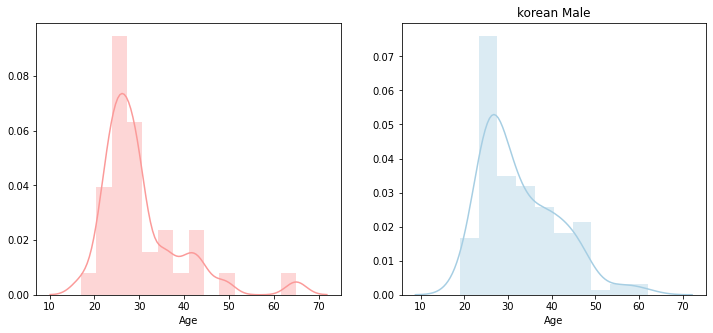

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

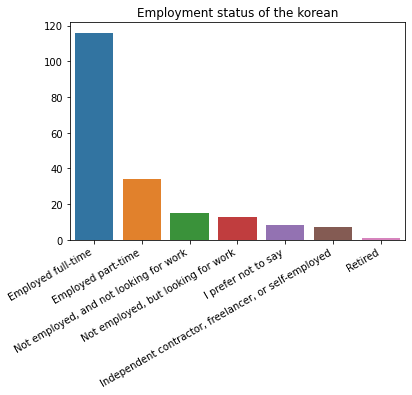

In [ ]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30,ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

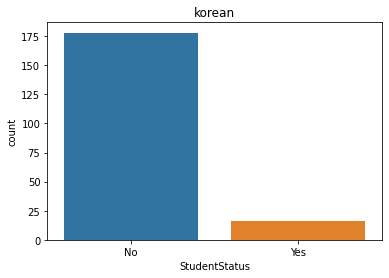

In [ ]:
#학생인지 아닌지-대부분 일을 하니 학생의 수 적음
korea['StudentStatus']=korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus',data=korea)
plt.title('korean')
plt.show()

In [ ]:
full_time=mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)
looking_for_job=mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


NameError: ignored

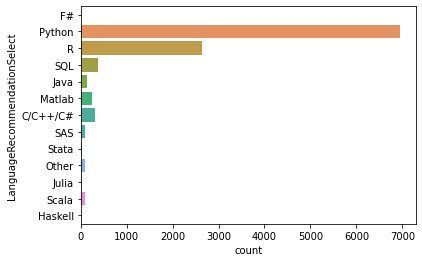

In [ ]:
#자주 묻는....FAQ
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

import plotly.figure_factory as fig_fact
top_lang = mcq['LanguageRecommendationSelect'].value_counts()
top_lang_dist = []
for lang in top_lang.index:
    top_lang_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['LanguageRecommendationSelect'] == lang)]['Age'])

group_labels = top_lang.index

fig = fig_fact.create_distplot(top_lang_dist, group_labels, show_hist=False)
py.iplot(fig, filename='Language Preferences by Age')


In [ ]:
#현재하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [ ]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

In [ ]:
#응답자 중 python&r
data=mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

In [ ]:
#데이터 사이언스 툴
mcq_ml_tool_count=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df=mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns=['응답 수', '비율']
mcq_ml_tool_df

In [ ]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

In [ ]:
#Data Science Methods
data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
#where learn ds platform
mcq['LearningPlatformSelect']=mcq['LearningPlatformSelect'].astype('str')
s=mcq.apply(lambda x:pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'

In [ ]:
plt.figure(figsize=(6,8))
data=s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

In [ ]:
use_features=[x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]

In [ ]:
#플랫폼과 유용함의 연관성
fdf={}
for feature in use_features:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]]=a

fdf=pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

#그림
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values('Very useful', ascending=False), annot=True)

In [ ]:
#유용함 정도
fdf.plot(kind='bar', figsize=(20,8), title='Usefullness of Learning Platforms')

In [ ]:
cat_features=[x for x in mcq.columns if x.find('LearningCategory')!=-1]
cat_features

In [ ]:
cdf={}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()

cdf=pd.Series(cdf)
cdf

In [ ]:
#플랫폼 별 도움되는 정도
plt.pie(cdf, labels=cdf.index, autopct='%1.1f!!', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [ ]:
#컴퓨터 사양?
#설문 내용 및 대상
qc=question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

In [ ]:
mcq['HardwarePersonalProjectsSelect']=mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x:x.split(','))
s=mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='hardware'

In [ ]:
s=s[s!='nan']

In [ ]:
pd.DataFrame(s.value_counts())

In [ ]:
#공부 시간
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1,0.5))

In [ ]:
figure, (ax1,ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax2).legend(loc='center right',bbox_to_anchor=(1,0.5))

In [ ]:
#블로그, 팟캐스트, 수업 등 추천할만한 것이 있는가?
mcq['BlogsPodcastsNewslettersSelect']=mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x:x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

In [ ]:
s=mcq.apply(lambda x:pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'
s.head()


In [ ]:
s=s[s!='nan'].value_counts().head(20)

In [ ]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [ ]:
mcq['CoursePlatformSelect']=mcq['CoursePlatformSelect'].astype('str').apply(lambda x:x.split(','))
mcq['CoursePlatformSelect'].head()

In [ ]:
t=mcq.apply(lambda x:pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name='courses'
t.head(20)

In [ ]:
t=t[t!='nan'].value_counts()

In [ ]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)
#코세라 앤드류 융 교수님 강의 훌륭

In [ ]:
#데이터사이언스 직무에서 중요한 스킬?
job_features=[x for x in mcq.columns if x.find('JobSkillImportance')!=-1 and x.find('JobSkillImportanceOther')==-1]
job_features

In [ ]:
jdf={}
for feature in job_features:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  jdf[feature[len('JobSkillImportance'):]]=a

jdf

In [ ]:
jdf=pd.DataFrame(jdf).transpose()
jdf

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",ascending=False),annot=True)

In [ ]:
jdf.plot(kind='bar',figsize=(12,6),title="Skill Importance in Data Science Jobs")

In [ ]:
#평균급여
mcq[mcq['CompensationAmount'].notnull()].shape

In [ ]:
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace('-','')

#환율
rates=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary=mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect','Country', 'CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates, left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary.head()

In [ ]:
 print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
 print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
 print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

In [ ]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

In [ ]:
plt.subplots(figsize=(8,12))

sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary',sal_coun.index, data=sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(),linestyle='dashed')
plt.title('Highest Salary Paying Countries')

In [ ]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

In [ ]:
salary_k=salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_k)

In [ ]:
salary_k.shape

In [ ]:
salary_k[salary_k['GenderSelect']=='Female']

In [ ]:
salary_k_m=salary_k[salary_k['GenderSelect']=='Male']
salary_k_m['Salary'].describe()

In [ ]:
salary_k_m

In [ ]:
#개인프로젝트나 학습용 데이터를 어디에서?

mcq['PublicDatasetsSelect']=mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [ ]:
q=mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1,drop=True)
q.name='courses'

In [ ]:
q=q[q!='nan'].value_counts()

In [ ]:
pd.DataFrame(q)

In [ ]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [ ]:
#주관식 응답
ff=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

In [ ]:
qc=question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

In [ ]:
ppcff=ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='응답 수'
pd.DataFrame(ppcff)

In [ ]:
#ds업무에서 가장 많은 시간을 필요로하는 일
time_features=[x for x in mcq.columns if x.find('Time')!=-1][4:10]

In [ ]:
tdf={}
for feature in time_features:
  tdf[feature[len('Time'):]]=mcq[feature].mean()

tdf=pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()